# D208_Task2_Mattinson

4030.5.1 : Logistic Regression

The graduate employs logistic regression algorithms in describing phenomena.

4030.5.3 : Regression Implications

The graduate makes assertions based on regression modeling.

In [1117]:
# import required packages
import sys
import os
import pandas as pd 

# math and stats
import numpy as np 
import scipy.stats as stats
import math
import statsmodels.api as sm

# plot
import matplotlib.pyplot as plt

# analysis using sklearn and seaborn
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [1118]:
# show python environment
print(sys.version)
print(sys.executable)

3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
w:\D208_task1_py\venv\Scripts\python.exe


In [1119]:
# read csv file
data = pd.read_csv(os.path.join('data','churn_clean.csv'))
print(data.columns.to_series().groupby(data.dtypes).groups)
print(data.shape)

{int64: ['CaseOrder', 'Zip', 'Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], float64: ['Lat', 'Lng', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}
(10000, 50)


In [1121]:
# drop unwanted cols
to_drop = ['City','County','Zip','Job','TimeZone', 'State', 'Churn', 
            'Lat', 'Lng', 'UID', 'Customer_id','Interaction', 'CaseOrder',
            'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
data = column_name_remove_space(data)
data.drop(columns = to_drop, inplace = True)
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}

In [1122]:
# create dataframe of predictor variables
predictor_variables = data.columns
predictor_df = data[predictor_variables]
predictor_df.drop('MonthlyCharge', axis=1, inplace=True)

# convert dummy variables
predictor_df = pd.get_dummies(predictor_df, drop_first=True)
predictor_df.columns.to_series().groupby(predictor_df.dtypes).groups

{uint8: ['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'], int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['Income', 'Outage_sec_perweek', 'Tenure', 'Bandwidth_GB_Year']}

w:\D208_task1_py\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


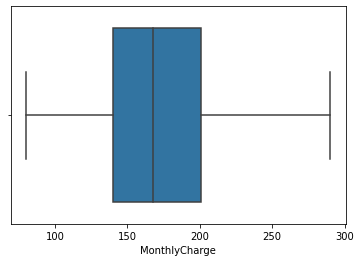

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


In [1123]:
# describe target data
ax = sns.boxplot('MonthlyCharge', data = data)
plt.show()
print(data['MonthlyCharge'].describe())

Contract
Month-to-month    2609
One year          1017
Two Year          1141
Name: MonthlyCharge, dtype: int64


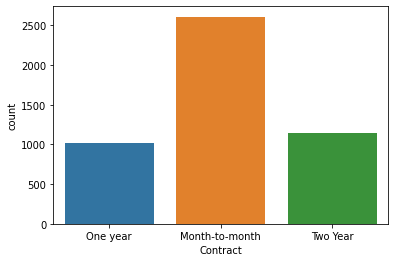

In [1124]:
c = 'Contract'
mean = data['MonthlyCharge'].mean()
temp_df = data.query('MonthlyCharge>=172')
sns.countplot(x=c, data=temp_df)
print(temp_df.groupby("Contract")["MonthlyCharge"].count())

In [1125]:
# describe numeric data
round(predictor_df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,9756.56,14432.70,0.00,738.00,2910.50,13168.00,111850.00
Children,10000.0,2.09,2.15,0.00,0.00,1.00,3.00,10.00
Age,10000.0,53.08,20.70,18.00,35.00,53.00,71.00,89.00
Income,10000.0,39806.93,28199.92,348.67,19224.72,33170.60,53246.17,258900.70
Outage_sec_perweek,10000.0,10.00,2.98,0.10,8.02,10.02,11.97,21.21
Email,10000.0,12.02,3.03,1.00,10.00,12.00,14.00,23.00
Contacts,10000.0,0.99,0.99,0.00,0.00,1.00,2.00,7.00
Yearly_equip_failure,10000.0,0.40,0.64,0.00,0.00,0.00,1.00,6.00
Tenure,10000.0,34.53,26.44,1.00,7.92,35.43,61.48,72.00
Bandwidth_GB_Year,10000.0,3392.34,2185.29,155.51,1236.47,3279.54,5586.14,7158.98


$$c = \sqrt{a^2 + b^2}$$

<AxesSubplot:>

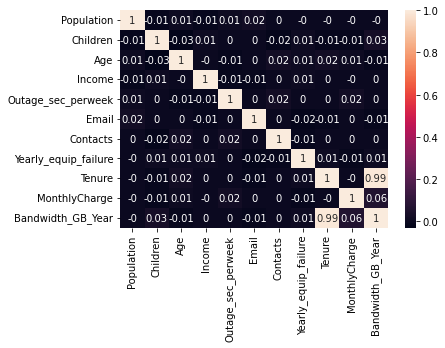

In [1126]:
# create correlation matrix
correlation_matrix = data.select_dtypes(include="number").corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [1127]:
# example of coded latex math equation
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

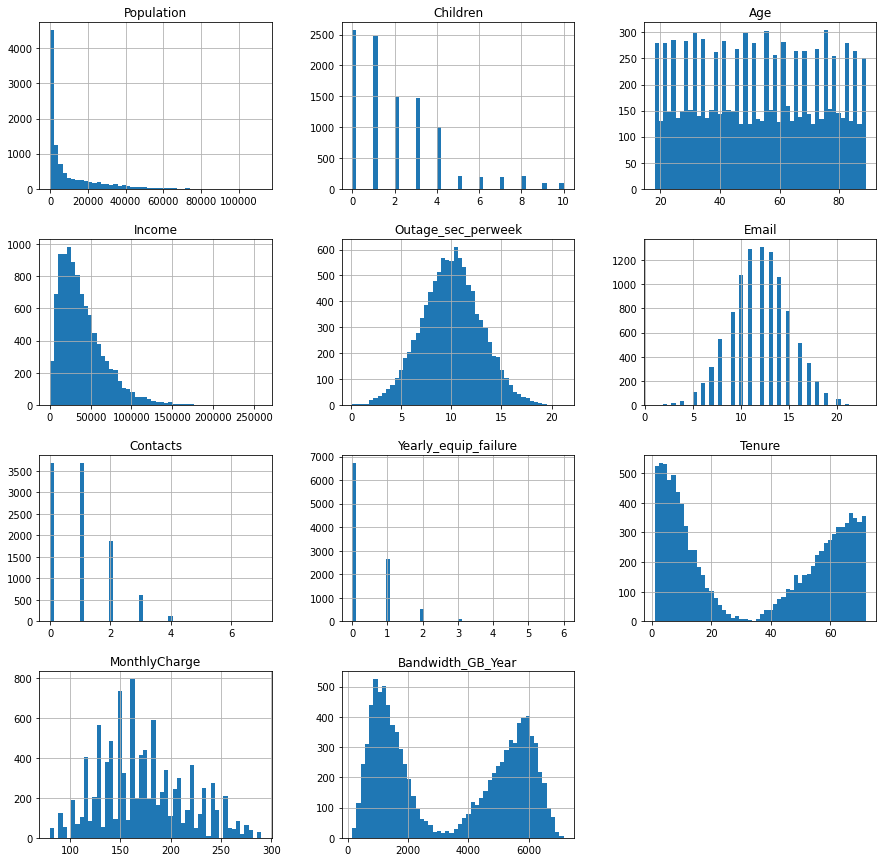

In [1128]:
# Create histograms of contiuous variables
ax = data.select_dtypes(include="number").hist(bins = 50, figsize=(15,15))
plt.show()

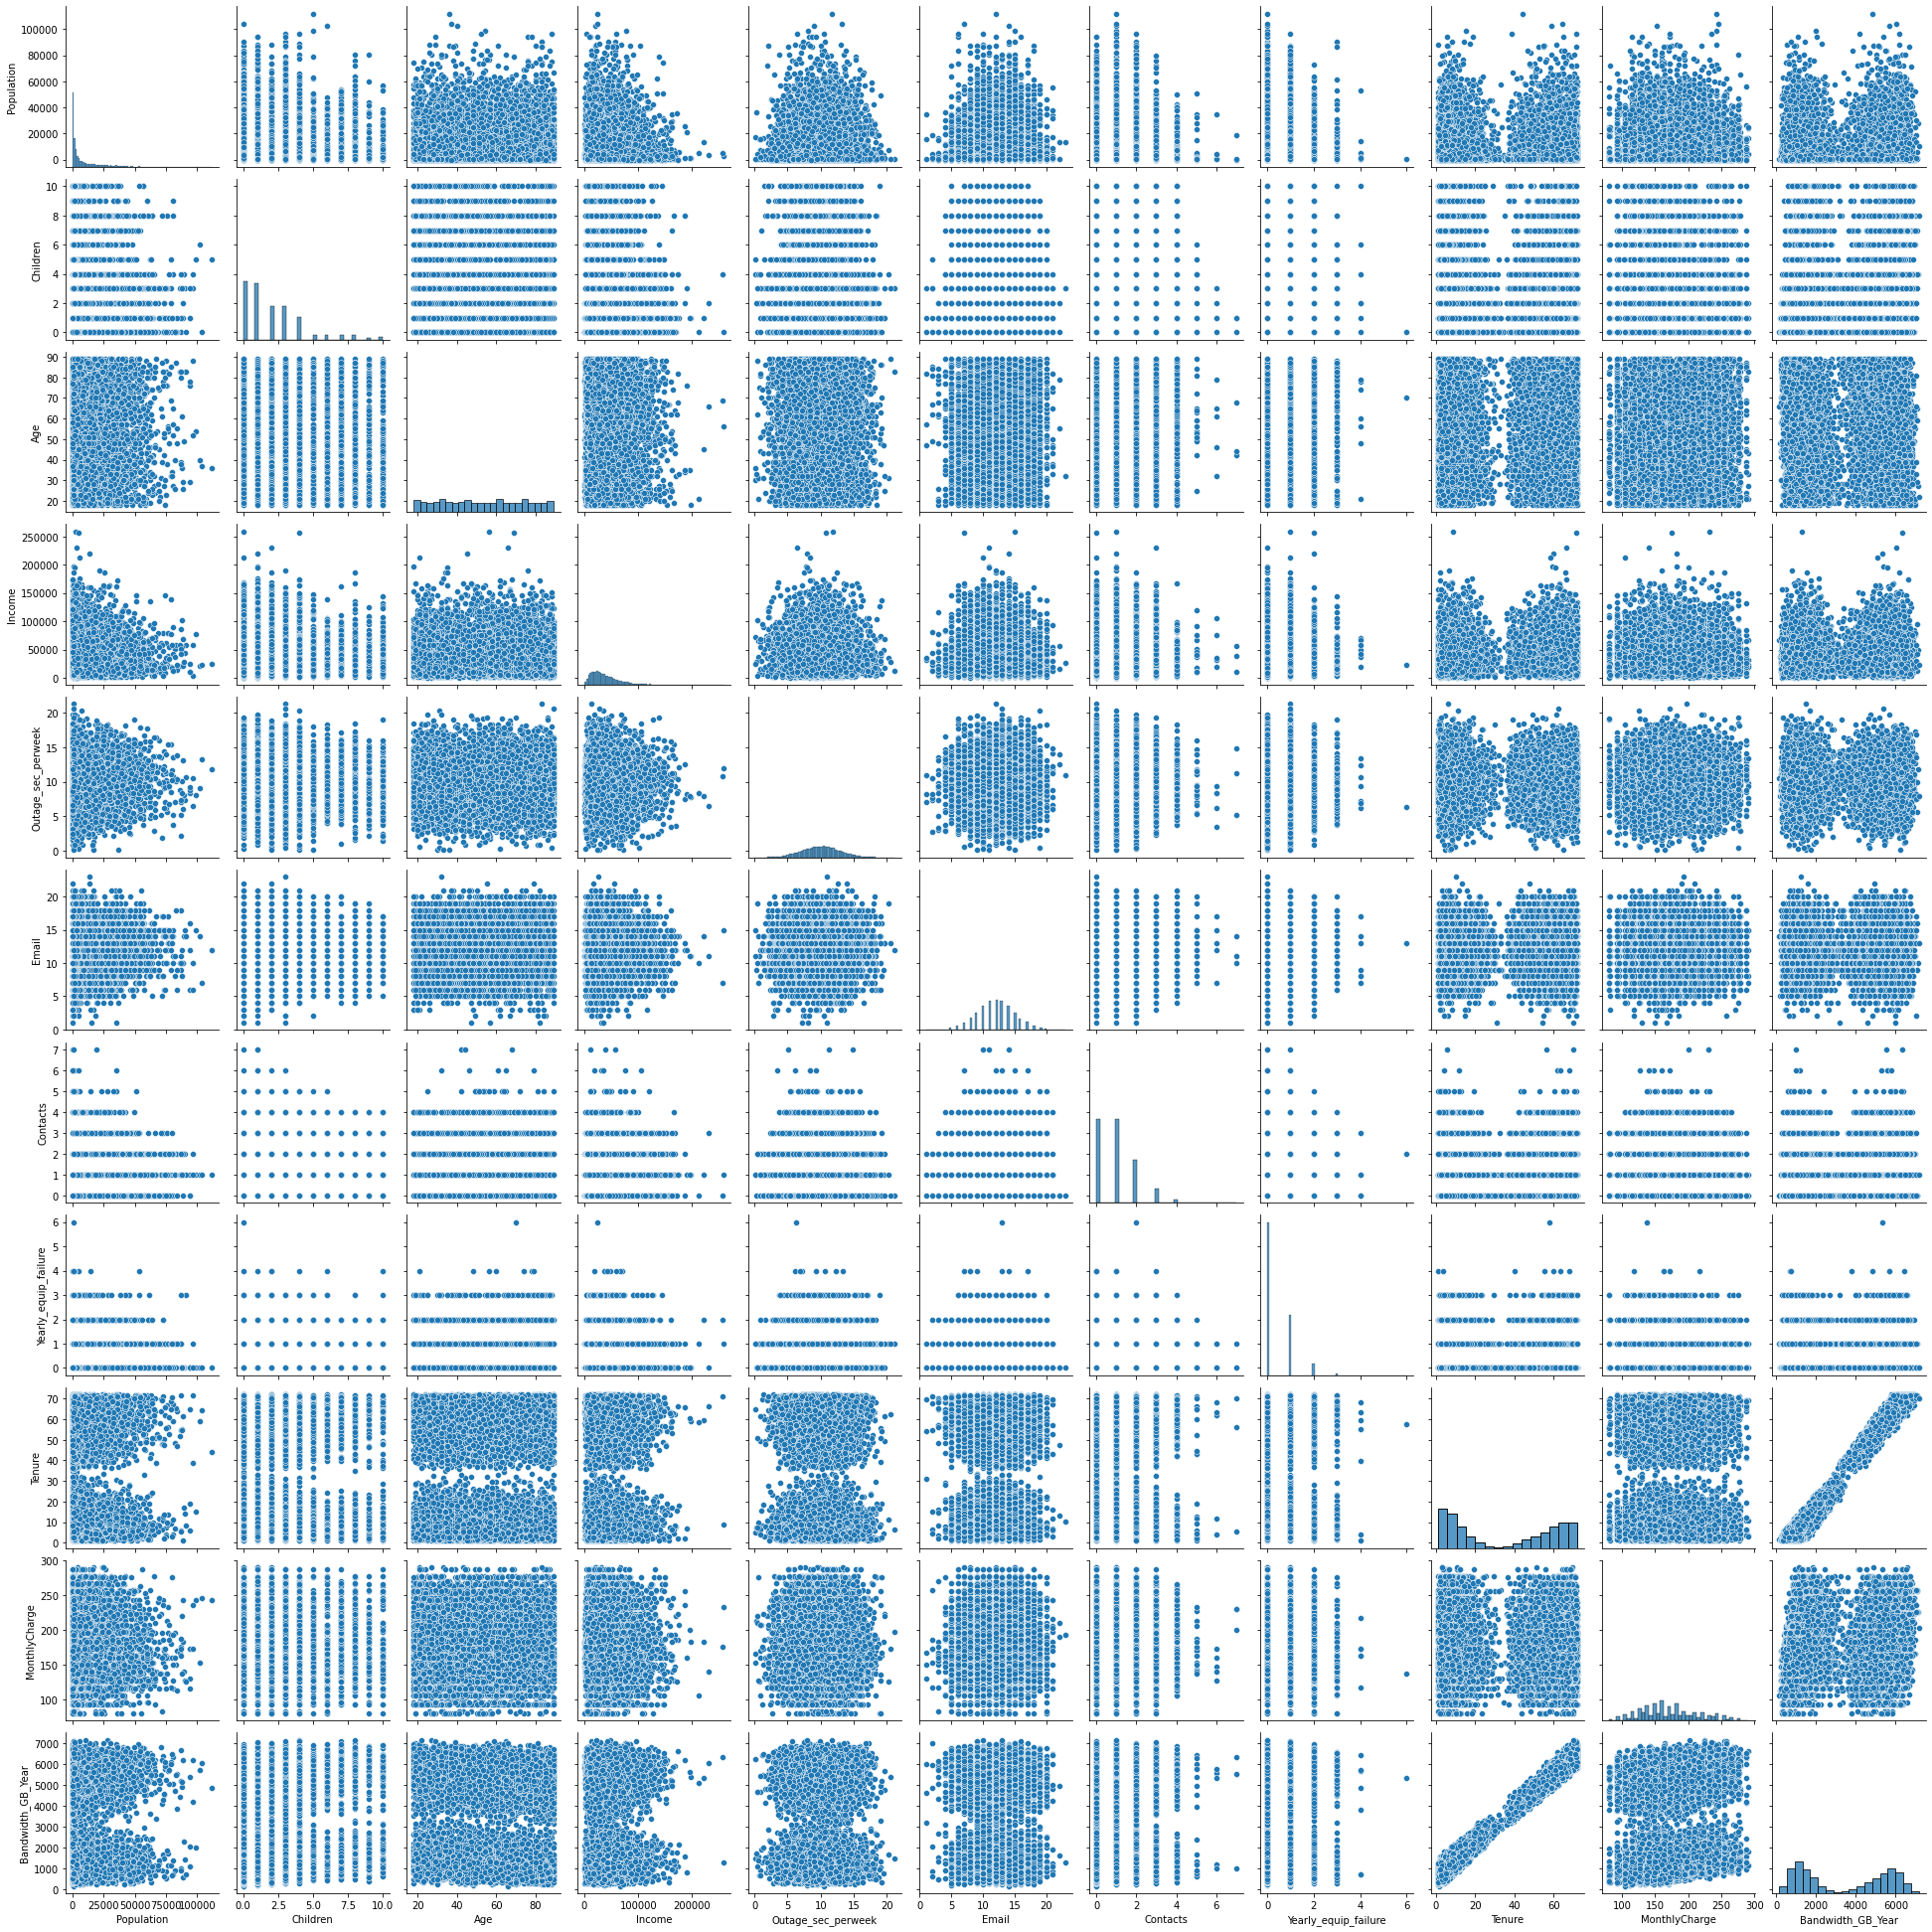

In [1129]:
# create data visualizations
ax = sns.pairplot(data.select_dtypes(include="number"))
plt.show()

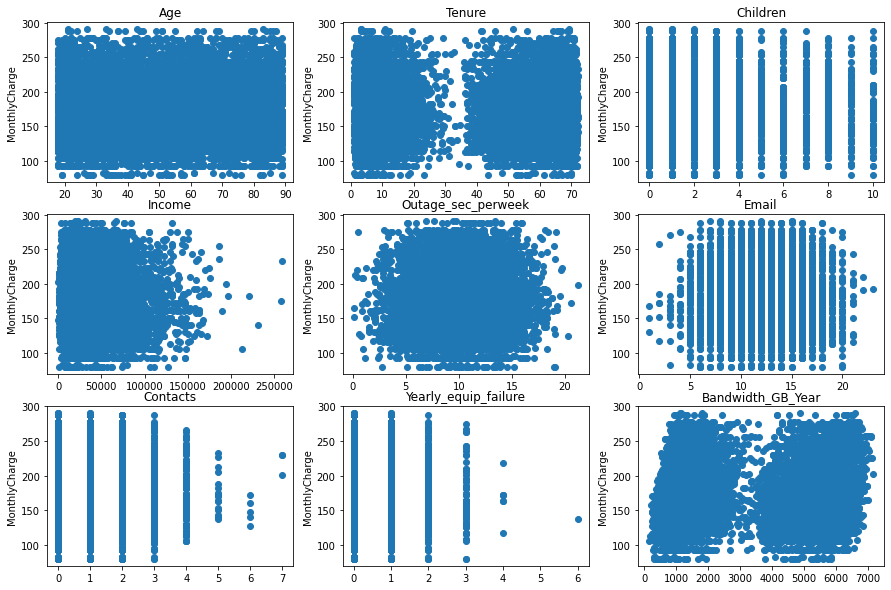

In [1130]:
# scatter plot of all numeric predictor variables
plt.figure(figsize=(15, 10))
features = ['Age','Tenure','Children','Income',
            'Outage_sec_perweek','Email','Contacts',
            'Yearly_equip_failure','Bandwidth_GB_Year']
target = data['MonthlyCharge']

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('MonthlyCharge')

In [1131]:
# initial model
y = data['MonthlyCharge']
X = predictor_df.select_dtypes(include="number")
X = (X - X.min()) / (X.max() - X.min()) 
Xc = sm.add_constant(X)
model_1 = sm.OLS(y, Xc).fit()
print(model_1.summary2())

                                Results: Ordinary least squares
Model:                         OLS                       Adj. R-squared:              0.995     
Dependent Variable:            MonthlyCharge             AIC:                         49597.8789
Date:                          2021-09-09 22:24          BIC:                         49871.8719
No. Observations:              10000                     Log-Likelihood:              -24761.   
Df Model:                      37                        F-statistic:                 5.966e+04 
Df Residuals:                  9962                      Prob (F-statistic):          0.00      
R-squared:                     0.996                     Scale:                       8.3155    
------------------------------------------------------------------------------------------------
                                        Coef.    Std.Err.     t     P>|t|    [0.025     0.975]  
---------------------------------------------------------------

w:\D208_task1_py\venv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

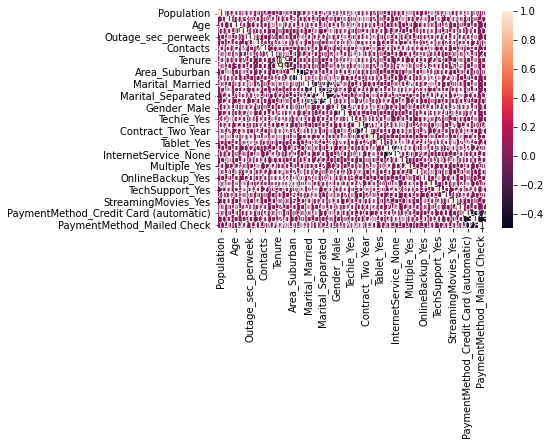

In [1132]:
# create correlation matrix
correlation_matrix = predictor_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [1133]:
# print out of highest values in the correlation matrix
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(predictor_df))

Top Absolute Correlations
Tenure                                 Bandwidth_GB_Year                 0.991495
Area_Suburban                          Area_Urban                        0.500711
InternetService_Fiber Optic            InternetService_None              0.461753
PaymentMethod_Electronic Check         PaymentMethod_Mailed Check        0.390989
PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check    0.367992
dtype: float64


<AxesSubplot:>

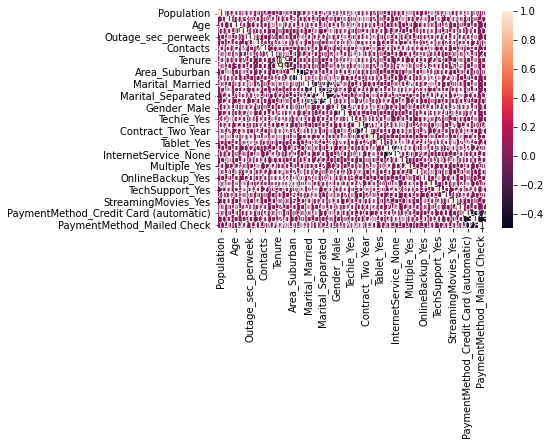

In [1134]:
# create correlation matrix
correlation_matrix = predictor_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [1135]:
# automatically drop cols if p > 0.05
equation = model_1.summary2().tables[1]
for i in equation.itertuples():
    #print(i[0], i[1], i[2], i[3], i[4])
    if i[4] > 0.05:
        # drop col
        predictor_df.drop(columns = [i[0]], inplace = True)

# also drop Bandwidth_GB_Year due to high multicollinearity with Tenure
predictor_df.drop(columns = ['Bandwidth_GB_Year'], inplace = True)
print(predictor_df.columns)

Index(['Children', 'Age', 'Tenure', 'Area_Suburban', 'Gender_Male',
       'Gender_Nonbinary', 'InternetService_Fiber Optic',
       'InternetService_None', 'Multiple_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Mailed Check'],
      dtype='object')


In [1136]:
# updated model 
y = data['MonthlyCharge']
X = predictor_df.select_dtypes(include="number")
X = (X - X.min()) / (X.max() - X.min()) 
Xc = sm.add_constant(X)
model_2 = sm.OLS(y, Xc).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.427e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:24:40   Log-Likelihood:                -35924.
No. Observations:               10000   AIC:                         7.188e+04
Df Residuals:                    9983   BIC:                         7.200e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

w:\D208_task1_py\venv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1137]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_2.summary2().tables[0][3][0]))
equation = model_2.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_2.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.958
Estimate [MonthlyCharge] as y = 
   +83.90 x ( const ) 
   +0.11 x ( Children ) 
   +0.23 x ( Age ) 
   -0.08 x ( Tenure ) 
   +0.06 x ( Area_Suburban ) 
   -0.26 x ( Gender_Male ) 
   -0.85 x ( Gender_Nonbinary ) 
   +19.84 x ( InternetService_Fiber Optic ) 
   -12.89 x ( InternetService_None ) 
   +32.60 x ( Multiple_Yes ) 
   +2.67 x ( OnlineSecurity_Yes ) 
   +22.57 x ( OnlineBackup_Yes ) 
   +12.52 x ( DeviceProtection_Yes ) 
   +12.56 x ( TechSupport_Yes ) 
   +42.19 x ( StreamingTV_Yes ) 
   +52.32 x ( StreamingMovies_Yes ) 
   +0.09 x ( PaymentMethod_Mailed Check ) 


In [1138]:
# print out of highest values in the correlation matrix
print("Top Absolute Correlations")
print(get_top_abs_correlations(predictor_df))

Top Absolute Correlations
InternetService_Fiber Optic  InternetService_None    0.461753
Gender_Male                  Gender_Nonbinary        0.146092
Children                     Age                     0.029732
Gender_Nonbinary             OnlineBackup_Yes        0.029316
Tenure                       DeviceProtection_Yes    0.028114
dtype: float64


<AxesSubplot:>

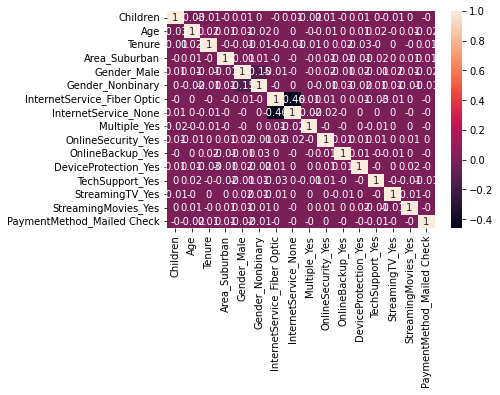

In [1139]:
# create correlation matrix
correlation_matrix = predictor_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [1140]:
# opted to leave the remaining numerical values 
# even with their high p-values

# drop columns with high multicollinearity
predictor_df.drop(columns = ['InternetService_None'], inplace = True)
print(predictor_df.columns)

Index(['Children', 'Age', 'Tenure', 'Area_Suburban', 'Gender_Male',
       'Gender_Nonbinary', 'InternetService_Fiber Optic', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Mailed Check'],
      dtype='object')


In [1141]:
# final model 
y = data['MonthlyCharge']
X = predictor_df
X = (X - X.min()) / (X.max() - X.min()) 
Xc = sm.add_constant(X)
model_3 = sm.OLS(y, Xc).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:24:41   Log-Likelihood:                -37170.
No. Observations:               10000   AIC:                         7.437e+04
Df Residuals:                    9984   BIC:                         7.449e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

w:\D208_task1_py\venv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1142]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_3.summary2().tables[0][3][0]))
equation = model_3.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_3.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.946
Estimate [MonthlyCharge] as y = 
   +78.79 x ( const ) 
   -0.03 x ( Children ) 
   +0.15 x ( Age ) 
   +0.08 x ( Tenure ) 
   +0.09 x ( Area_Suburban ) 
   -0.19 x ( Gender_Male ) 
   -0.90 x ( Gender_Nonbinary ) 
   +24.74 x ( InternetService_Fiber Optic ) 
   +32.80 x ( Multiple_Yes ) 
   +2.80 x ( OnlineSecurity_Yes ) 
   +22.58 x ( OnlineBackup_Yes ) 
   +12.46 x ( DeviceProtection_Yes ) 
   +12.64 x ( TechSupport_Yes ) 
   +42.18 x ( StreamingTV_Yes ) 
   +52.34 x ( StreamingMovies_Yes ) 
   +0.12 x ( PaymentMethod_Mailed Check ) 
